# 0 - Préliminaires


Executer les cellules suivantes pour importer les librairies utiles et les fonctions de base

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import pca
from sklearn.metrics import classification_report



In [2]:
h = .02  # step size in the mesh

def plot_classifier_training(clf,X_train,X_test,y_train,y_test):
    """
    Entraine sans normaliser et affiche les résultats du classifier clf (qui doit exposer l'interface sklearn) pour un dataset 2D. 
    """
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig,ax = plt.subplots()
    
    X = np.concatenate((X_train,X_test),axis=0)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('Score : %.2f %% ' % (score*100.0)).lstrip('0'),
                size=15, horizontalalignment='right')
    return score
    

# 1 Essai de quelques classifiers
Dans cette première partie, on essaiera sur des jeux de données basiques quelques classifiers afin de comprendre leur fonctionnement
 
## 1.0 Chargement et affichage des jeux de données

### Dataset a deux classes trivial
Executer la cellule suivante pour construire et afficher le jeu de données

<IPython.core.display.Javascript object>


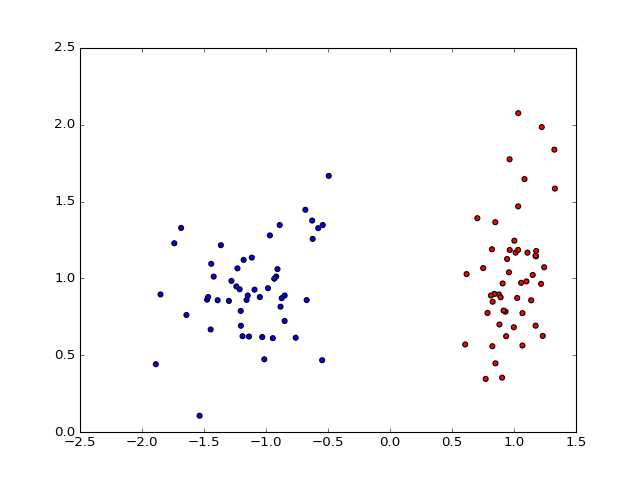

In [3]:
# Dataset 2D trivial : 
trivial_data, trivial_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
# color map:
trivial_colormap = ['r' if label==0 else 'b' for label in trivial_labels]
plt.figure()
plt.scatter(trivial_data[:,0],trivial_data[:,1], c=trivial_colormap)

### Dataset linéairement séparable
Executer la cellule suivante pour construire et afficher le jeu de données

<IPython.core.display.Javascript object>


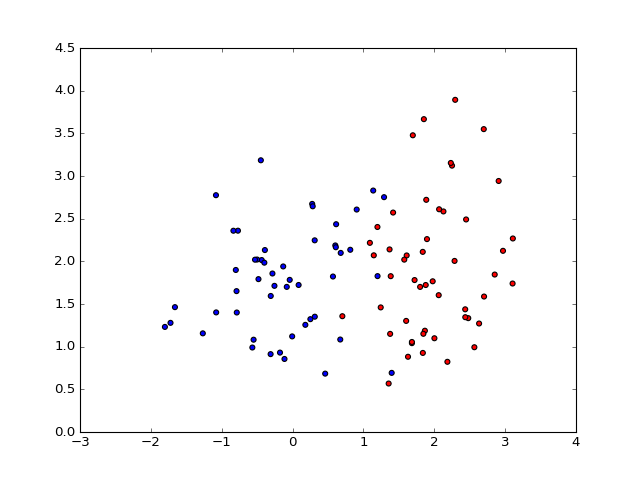

In [4]:
rng = np.random.RandomState(2)
linear_sep_data = trivial_data + 2*rng.uniform(size=trivial_data.shape)
linear_sep_labels = trivial_labels
linear_sep_colormap = trivial_colormap

plt.figure()
plt.scatter(linear_sep_data[:,0],linear_sep_data[:,1], c=linear_sep_colormap)

### Moon dataset 
Executer la cellule suivante pour construire et afficher le jeu de données

<IPython.core.display.Javascript object>


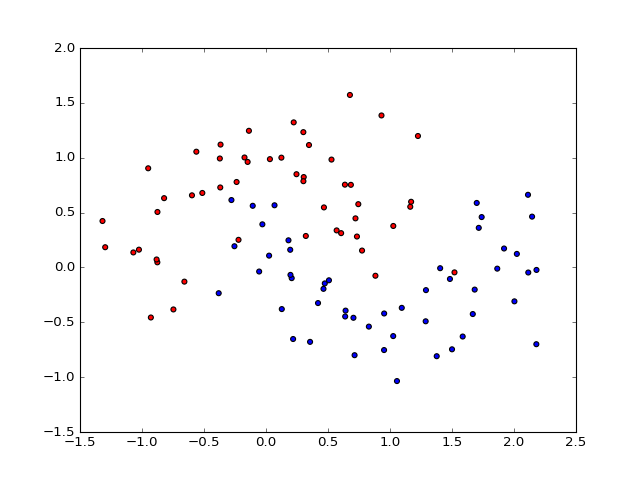

In [5]:
moon_data,moon_labels = make_moons(noise=0.3, random_state=0)
moon_colormap = ['r' if label==0 else 'b' for label in moon_labels]

plt.figure()
plt.scatter(moon_data[:,0],moon_data[:,1], c=moon_colormap)

### Dataset encapsulé
Executer la cellule suivante pour construire et afficher le jeu de données

<IPython.core.display.Javascript object>


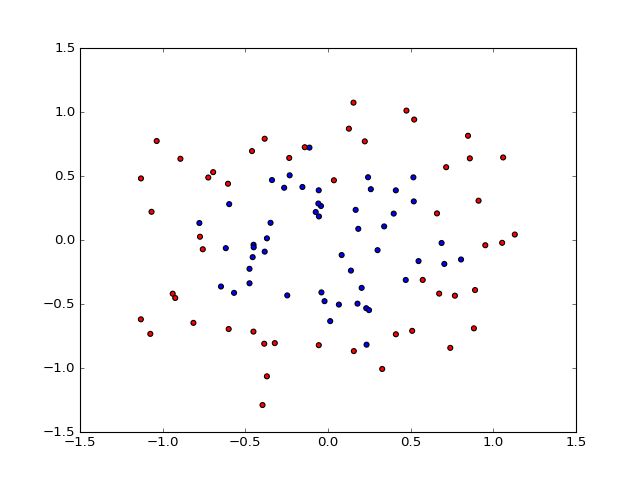

In [6]:
circle_data,circle_label = make_circles(noise=0.2, factor=0.5, random_state=1)
circle_colormap = ['r' if label==0 else 'b' for label in circle_label]

plt.figure()
plt.scatter(circle_data[:,0],circle_data[:,1], c=circle_colormap)

________________________________________________________________________________________________________

## 1.1 Classification 
### Construction d'un jeu de données de validation


<IPython.core.display.Javascript object>


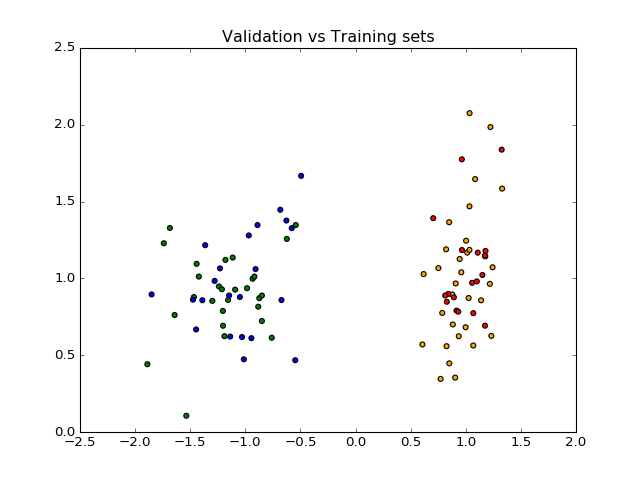

In [7]:
# construction des datasets de training et test pour le dataset trivial :

trivial_train, trivial_test, trivial_train_labels, trivial_test_labels = \
                train_test_split(trivial_data, trivial_labels, test_size=.4, random_state=42)
# colormaps pour l'affichage
trivial_train_colormap = ['orange' if label==0 else 'green' for label in trivial_train_labels]
trivial_test_colormap = ['r' if label==0 else 'b' for label in trivial_test_labels]


# affichage des datasets : 
plt.figure()
plt.scatter(trivial_train[:,0],trivial_train[:,1], c= trivial_train_colormap,label='Training set trivial')
plt.scatter(trivial_test[:,0],trivial_test[:,1], c= trivial_test_colormap,label='Validation set trivial')
plt.title('Validation vs Training sets')




### Machine à support vectoriel (SVM) linéaire
Executer la cellule suivante pour entrainer et afficher la classification du SVM sur le dataset trivial 

<IPython.core.display.Javascript object>


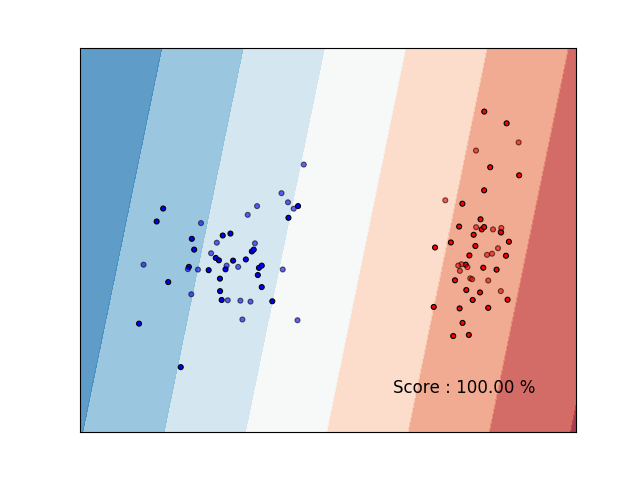

1.0

In [8]:
# création du classifier à support vectoriel linéaire
clf = SVC(kernel='linear')

plot_classifier_training(clf,trivial_train, trivial_test, trivial_train_labels, trivial_test_labels)

#### Exercice
Construire les jeux de validation pour les autres datasets, puis entrainer et afficher le SVM linéaire sur ces datasets.

Conclure sur la capacité d'un tel classifier a traiter les données plus complexes

In [ ]:
linear_sep_train, linear_sep_test, linear_sep_train_labels, linear_sep_test_labels = #A completer
  
moon_train, moon_test, moon_train_labels, moon_test_labels = #A completer

circle_train, circle_test, circle_train_labels, circle_test_labels = #A completer

# evaluer les classifiers ici




### L'astuce du noyeau (kernel trick)
Evaluer sur les différents datasets des SVM avec des noyeaux différents tels que ceux cités ci dessous et jouer avec les paramètres des noyeaux pour mesurer leur influence (voir <a href=http://scikit-learn.org/stable/modules/svm.html#svm-kernels>la doc sklearn</a> pour plus d'informations sur les noyeaux disponibles)

Conclure sur les noyeaux les mieux adaptés a chacun des datasets

In [ ]:
gaussian_svm = SVC(kernel='rbf',gamma=2, C=1)
polynomial_svm = SVC(kernel='poly',degree=2)
sigmoid_svm = SVC(kernel='sigmoid',gamma=2, coef0=2)

### K plus proches voisins (KNN)
Etudier le comportement du classifier suivant sur les différents datasets


In [ ]:
knn_clf = KNeighborsClassifier(3)

Etudier l'impact du nombre de voisins sur la qualité de la prédiction selon les différents datasets

### Decision Tree Classifier
Evaluer le classifier suivant sur les différents datasets et analyser son comportement

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=5)

### Random Forest Classifier
Evaluer le classifier suivant sur les différents datasets et étudier son comportement

In [ ]:
rf_clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

## 1.2 Scoring
Utiliser la fonction suivante pour calculer les scores et la matrice de confusion des différents classifiers essayés dans la partie précédente. Conclure sur les classifiers les mieux adaptés a chacun des datasets. 

In [ ]:
def get_scoring_report(clf,X_train,X_test,y_train,y_test,beta=1):
    """
    renvoie les valeurs suivantes pour un classifier clf entrainé sur X_train,y_train et scoré sur X_test,y_test:
    tp : vrais positifs
    tn : vrais négatifs
    fp : faux positifs
    fn : faux négatifs
    precision : précision
    """
    tp=0
    tn=0
    fp=0
    fn=0
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    for i in range(y_pred.size):
        predicted = y_pred[i]
        true_val = y_test[i]
        if predicted==true_val:
            if true_val==1:
                tp+=1
            else:
                tn+=1
        else:
            if predicted==1:
                fp+=1
            else:
                fn+=1
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    f_beta = (1+beta**2)*(precision*recall/(precision*(beta**2)+recall))
    
    return tp,tn,fp,fn,precision,recall,accuracy,f_beta

In [ ]:
# exemple d'utilisation
tp,tn,fp,fn,precision,recall,accuracy,f_beta = get_scoring_report(clf,trivial_train, trivial_test, trivial_train_labels, trivial_test_labels)
print("precision : "+ str(precision))

# 2 Application a des données réelles


## - Import des données
 
Le dataset chargé par la cellule suivante constitue des stats de joueurs de la NBA, labellisées par zero si le joueur en question n'a pas passé plus de 5 ans en NBA, et par un dans le cas contraire. 
![alt text](./ds_params.png "Données d'entrée")

In [ ]:
# Load dataset
df = pd.read_csv("nba_logreg.csv")

# extraction des noms, labels, paramètres et valeurs
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values
# replacing Nan values (only present when no 3 points attempts have been performed by a player)
for x in np.argwhere(np.isnan(df_vals)):
    df_vals[x]=0.0
df

L'objectif de cette partie est de choisir le score le plus approprié à ce que serait une prédiction sportive visant a savoir si l'on peut miser sur un joueur et investir dans sa carrière. Lorsque vous aurez sélectionné le score le plus approprié, utilisez la fonction de scoring ainsi que ce qui a été vu en partie 1 pour entrainer le meilleur classifier possible sur le dataset de validation fourni. 

La cellule suivante offre une vue du dataset basculé en 2D grace a une analyse en composantes principales (cf. cours).  

In [ ]:
pcized = pca.PCA().fit_transform(df_vals) 
plt.figure()
plt.scatter(pcized[:,0],pcized[:,1],c=['r' if label==0.0 else 'b' for label in labels.tolist()], alpha=0.6)

Construction des datasets de training et de validation

In [ ]:
nba_train, nba_test, nba_train_labels, nba_test_labels = \
                train_test_split(df_vals, labels, test_size=.4, random_state=42)


La cellule suivante contient des outils qui peuvent éventuellement vous servir a aguiller votre recherche du meilleur classifier


In [ ]:
dictIndexes = {}
param_list = list(paramset)
# histogramme sur un des paramètres
for i in range(len(param_list)):
    dictIndexes[param_list[i]]=i

def plot_nba_feature_histogram(feature_name, dataset,color='b',new_fig=True):
    """
    dessine un histogramme de la couleur souhaitée pour la distribution de paramètre 
    de nom feature_name dans le dataset dataset
    
    Si new_fig=False, plotte l'histogramme dans la figure courante, sinon, crée 
    une nouvelle figure
    
    ATTENTION: cela ne fonctionne que pour les datasets issus directement du dataset 
    source, dont le training et validation dataset, pas ceux qui ont étés reconstruits
    a partir de la fonction get_subset
    """
    
    findex = dictIndexes[feature_name]
    if new_fig:
        plt.figure()
    plt.hist(dataset[:,findex],color=color)
    

def get_feature_stats(feature_name,dataset):
    """
    retourne un triplet moyenne, eccart type, étendue pour la variable demandée
    
    ATTENTION: cela ne fonctionne que pour les datasets issus directement du dataset 
    source, dont le training et validation dataset, pas ceux qui ont étés reconstruits
    a partir de la fonction get_subset
    """
    vals = dataset[:,dictIndexes[feature_name]]
    return np.average(vals),np.std(vals),np.max(vals)-np.min(vals)

def get_subset(dataset,feature_names):
    """
    retourne un sous ensemble du dataset fourni ne contenant que 
    les features présentes dans la liste feature_names
    
     ATTENTION: cela ne fonctionne que pour les datasets issus directement du dataset 
    source, dont le training et validation dataset, pas ceux qui ont étés reconstruits
    a partir de cette même fonction
    """
    outdf = []
    for x in feature_names:
        outdf.append(dataset[:,dictIndexes[x]])
    print(outdf)
    return(np.array(outdf).transpose())

In [ ]:
# quelques exemples d'utilisation des fonctions proposées

plot_nba_feature_histogram('3P%',df_vals,color='yellow')
print(get_feature_stats('3P%',df_vals))
print(get_subset(df_vals,['3P%','3P Made']))


In [ ]:
# affiche les indexs utilisés pour requêter les features
dictIndexes

In [ ]:
#--------------------------# ENTRAINEZ VOS CLASSIFIERS ICI #----------------------------#